# How Not To Put A Nation To Sleep
## Blake Whittington and Gabriele Spiridaviciute
***
## Are People a Good Judge of Their Own Sleep and Health?
### Initial Cluster Analysis
The main purpose of this analysis is to determine the overall percentage of each cluster's surveyors that are struggling with each substance studied in the analysis respectively.b

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Parameters
Here we load in the results from each of the general analysis results as well as the now modified cluster dataframe which contains the surveyors that are in each of the main clusters.

In [2]:
alcohol_cluster_df = pd.read_pickle('../data_file/cleaned_data_pickle/alcohol_cluster_results.pickle')
caffeine_cluster_df = pd.read_pickle('../data_file/cleaned_data_pickle/caffeine_cluster_results.pickle')
tobacco_cluster_df = pd.read_pickle('../data_file/cleaned_data_pickle/tobacco_cluster_results.pickle')
cluster_desirability_df = pd.read_pickle('../data_file/cleaned_data_pickle/cluster_descriptions.pickle')

 This is again a reminder of what is in each of the clusters that have been selected thus far.

In [3]:
cluster_desirability_df

,health,sleep,bmi,age,marital_status,gender,cluster_count
2,Excellent,Fairly Good,20-25,30-40,married_or_partnered,Male,96
3,Good,Fairly Good,30-35,40-50,married_or_partnered,Male,117
1,Good,Fairly Good,25-30,30-40,married_or_partnered,Female,103
4,Good,Fairly Bad,30-35,50-60,married_or_partnered,Female,72
14,Good,Fairly Good,20-25,20-30,single,Male,71
6,Good,Fairly Good,25-30,50-60,married_or_partnered,Female,59


In [4]:
alcohol_cluster_df

limit_status,Above Drinking Limit,Below Drinking Limit,Undeterminable Drinking Limit,cluster_alcohol_threshold_percent
cluster_group,,,,
14.0,4,60,7,0.062500
6.0,2,51,6,0.037736
2.0,3,82,11,0.035294
4.0,2,61,9,0.031746
3.0,3,104,9,0.028037
1.0,2,86,14,0.022727


In [5]:
caffeine_cluster_df

caffeine_threshold_level,Above Daily Threshold,Below Daily Threshold,cluster_caffeine_threshold_percent
cluster_group,,,
14.0,14,53,0.208955
2.0,16,76,0.173913
3.0,16,95,0.144144
4.0,10,60,0.142857
1.0,11,89,0.110000
6.0,2,55,0.035088


In [6]:
tobacco_cluster_df

smoking_status,Current Smoker,Non-Smoker,cluster_tobacco_threshold_percent
cluster_group,,,
14.0,16,55,0.145455
4.0,10,62,0.080645
2.0,13,83,0.078313
3.0,12,105,0.057143
6.0,6,53,0.056604
1.0,10,93,0.053763


## Combine the results

In [7]:
percent_df = pd.concat([alcohol_cluster_df, caffeine_cluster_df, tobacco_cluster_df], axis=1)

In [8]:
percent_df.rename(columns={'Above Daily Threshold': 'Above Caffeine Limit', 'cluster_alcohol_threshold_percent': '% Over Alcohol Threshold', 'cluster_caffeine_threshold_percent': '% Over Caffeine Threshold' , 'cluster_tobacco_threshold_percent': '% Over Tobacco Threshold'}, inplace=True)


In [9]:
percent_df

,Above Drinking Limit,Below Drinking Limit,Undeterminable Drinking Limit,% Over Alcohol Threshold,Above Caffeine Limit,Below Daily Threshold,% Over Caffeine Threshold,Current Smoker,Non-Smoker,% Over Tobacco Threshold
cluster_group,,,,,,,,,,
1.0,2,86,14,0.022727,11,89,0.110000,10,93,0.053763
2.0,3,82,11,0.035294,16,76,0.173913,13,83,0.078313
3.0,3,104,9,0.028037,16,95,0.144144,12,105,0.057143
4.0,2,61,9,0.031746,10,60,0.142857,10,62,0.080645
6.0,2,51,6,0.037736,2,55,0.035088,6,53,0.056604
14.0,4,60,7,0.062500,14,53,0.208955,16,55,0.145455


In [10]:
percent_df['total_poor_judge_count'] = percent_df[['Above Drinking Limit', 'Above Caffeine Limit', 'Current Smoker']].sum(axis=1)
# percent_df['percent_total_poor_judge_count'] = percent_df['']

In [11]:
percent_df['total_poor_judge_count']

cluster_group
1.0     23
2.0     32
3.0     31
4.0     22
6.0     10
14.0    34
Name: total_poor_judge_count, dtype: int64

In [12]:
percent_df.index = percent_df.index.astype(int)

In [13]:
percent_df = percent_df[['Above Drinking Limit', 'Above Caffeine Limit', 'Current Smoker', '% Over Alcohol Threshold', '% Over Caffeine Threshold', '% Over Tobacco Threshold', 'total_poor_judge_count']]

In [14]:
percent_df.iloc[:,3:]

,% Over Alcohol Threshold,% Over Caffeine Threshold,% Over Tobacco Threshold,total_poor_judge_count
cluster_group,,,,
1,0.022727,0.110000,0.053763,23
2,0.035294,0.173913,0.078313,32
3,0.028037,0.144144,0.057143,31
4,0.031746,0.142857,0.080645,22
6,0.037736,0.035088,0.056604,10
14,0.062500,0.208955,0.145455,34


In [15]:
percent_df.iloc[:,6:7]

,total_poor_judge_count
cluster_group,
1,23
2,32
3,31
4,22
6,10
14,34


In [16]:
# percent_df.iloc[:,3:] = percent_df.iloc[:,3:].applymap(lambda x: "{0:.2f}%".format(x*100))

In [17]:
percent_df.iloc[:,3:]

,% Over Alcohol Threshold,% Over Caffeine Threshold,% Over Tobacco Threshold,total_poor_judge_count
cluster_group,,,,
1,0.022727,0.110000,0.053763,23
2,0.035294,0.173913,0.078313,32
3,0.028037,0.144144,0.057143,31
4,0.031746,0.142857,0.080645,22
6,0.037736,0.035088,0.056604,10
14,0.062500,0.208955,0.145455,34


In [18]:
p  = percent_df.sort_values('total_poor_judge_count').reindex([14,6,4,3,2,1]).iloc[:,6:7]
p.reset_index(drop=True, inplace=True)
p
# .reindex([14,6,4,3,2,1]).

,total_poor_judge_count
0,34
1,10
2,22
3,31
4,32
5,23


In [19]:
cluster_population = cluster_desirability_df.loc[:, 'cluster_count']
cluster_population.sort_index(ascending=True,inplace=True)
cluster_population = cluster_population.reset_index(drop=True)
cluster_population
# cluster_population = cluster_population.remove(columns=['index'])

0    103
1     96
2    117
3     72
4     59
5     71
Name: cluster_count, dtype: int64

In [20]:
cluster_population

0    103
1     96
2    117
3     72
4     59
5     71
Name: cluster_count, dtype: int64

In [21]:
percent_df = percent_df.iloc[:,3:6].loc[[14,6,3,2,4,1]]
percent_df = percent_df.loc[:2,:]

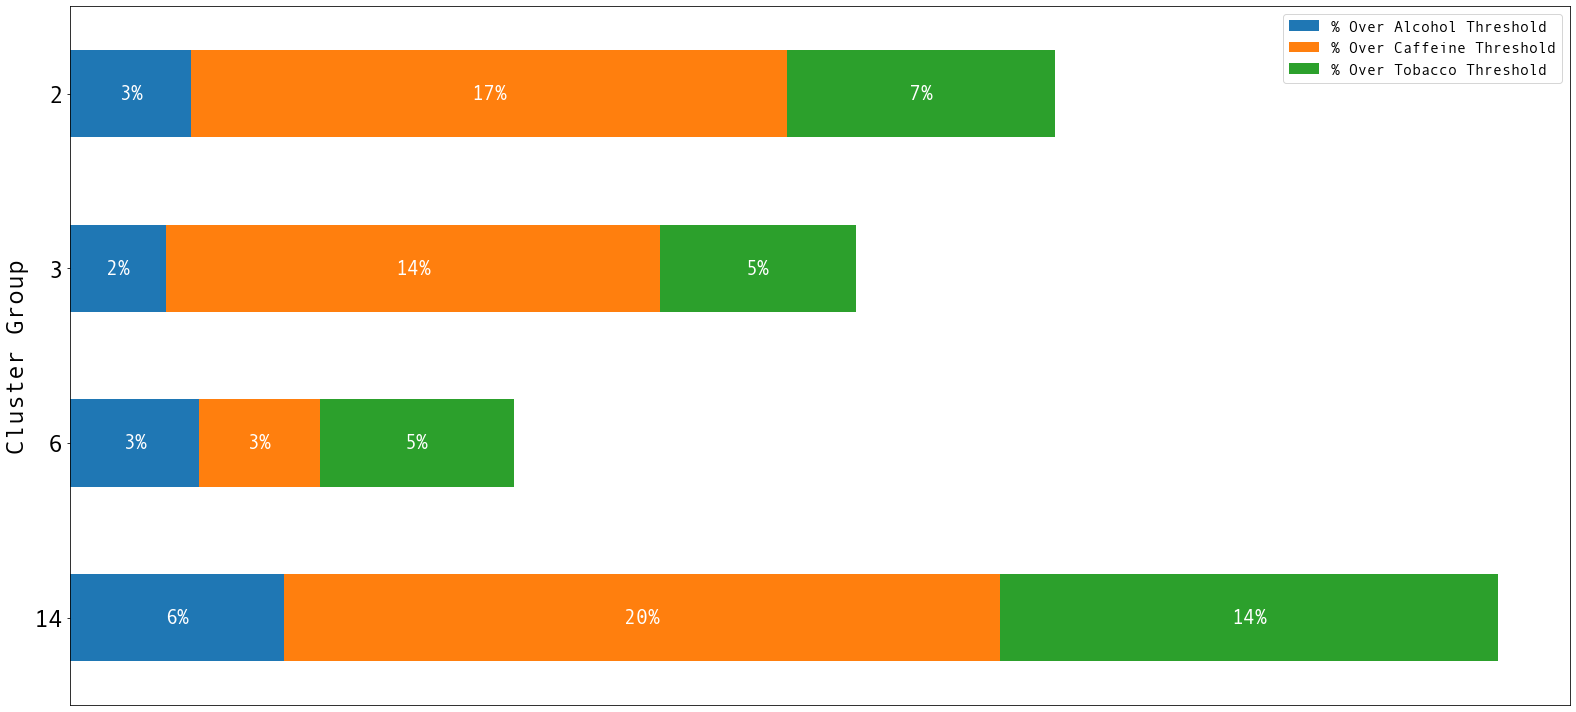

In [25]:

fig,ax= plt.subplots(figsize=(22, 10))
# # fig, ax = plt.subplots(figsize=(10,30))
plt.rcParams['font.family'] = 'Andale Mono'
percent_df.plot(ax = ax, kind='barh', stacked=True)

# ax.set_xlabel('Percent of Total Relative Poor Judges')
ax.set_ylabel('Cluster Group')
for patch in ax.patches:
    x,y = patch.get_xy()
    w, h = patch.get_width(), patch.get_height()
    ax.text(x+w/2, y+h/2, str(int(w*100))+'%',ha='center', va='center',
            color='white', fontweight='bold', fontsize=20,
            )
plt.tick_params(axis='x', which='both', bottom=False, top=False,labelbottom=False)
ax.legend(prop={'size': 15})

plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'axes.labelsize': 25})
plt.rcParams.update({'ytick.labelsize': 25})
plt.rcParams.update({'xtick.labelsize': 25})


plt.rcParams.update


plt.tight_layout()

plt.savefig('../data_file/graphs/PNG/3023_poor_judge_from_clusters.png', dpi=300)
plt.savefig('../data_file/graphs/JPG/3023poor_judge_from_clusters.jpg', dpi=300)


In [23]:
percent_df.iloc[:,:3]


,% Over Alcohol Threshold,% Over Caffeine Threshold,% Over Tobacco Threshold
cluster_group,,,
14,0.062500,0.208955,0.145455
6,0.037736,0.035088,0.056604
3,0.028037,0.144144,0.057143
2,0.035294,0.173913,0.078313


In [24]:

# fig,ax= plt.subplots(figsize=(18, 8))
# percent_df.sort_values('total_poor_judge_count', ascending=True).iloc[[0,2,3,5],:3].plot(ax=ax,kind='barh', stacked=True)
# ax.set_xlabel('Number of Surveyors')
# ax.set_ylabel('Cluster Group')
# ax.set_title('Poor Judges From Clusters', fontsize=26)
# # plt.rcParams.update({'font.size': 15})
# # plt.rcParams.update({'axes.labelsize': 30})
# # plt.rcParams.update({'ytick.labelsize': 30})
# # plt.rcParams.update
#
# ax.legend(prop={'size': 6})
# plt.tight_layout()
# plt.savefig('../data_file/Poor_Judge_From_Clusters.png', format='png', dpi=300)

Start of new graph